# Introduction


Hi there! In this project, I collected data from various sources to build a Linear Regression model for predicting GDP of different countries.
I gathered information from https://data.worldbank.org/ and combined multiple datasets, including:

- Energy use (kg of oil equivalent per capita)
- Exports and imports constant
- Final consumption expenditure constant
- Foreign direct investment, net inflows (% of GDP)
- Foreign direct investment, net inflows (BoP, current US\\$)
- GDP per person employed (constant 2017 PPP \\$)
- GDP per unit of energy use (constant 2017 PPP $ per kg of oil equivalent)
- GDP-constant
- Gross domestic savings % of GDP
- Inflation, consumer prices (annual %)
- Labor force with advanced education (% of total working-age population with advanced education)
- Labor force, total
- Net trade in goods and services (BoP, current US\\$)
- Population growth (annual %)
- Population total
- Real interest rate (%)
- Tax revenue (% of GDP)
- Unemployment, total (% of total labor force) (modeled ILO estimate)

To make sure the data was accurate and reliable, I only included data from the year 2000 and later. And after carefully researching the differences between nominal and real GDP, I chose to use real GDP as the dependent variable in my model. Real GDP measures output using constant prices, while nominal GDP uses current prices.
This way, I believed the model would be more accurate in predicting the GDP of different countries. Let's dive in!

In [1]:
# import libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Data cleaning & preprocessing

In [2]:
datasets = [
    'Energy use (kg of oil equivalent per capita).csv',
    'Exports and imports constant.csv',
    'Final consumption expenditure constant.csv',
    'Foreign direct investment, net inflows (% of GDP).csv',
    'Foreign direct investment, net inflows (BoP, current US$).csv',
    'GDP per person employed (constant 2017 PPP $).csv',
    'GDP per unit of energy use (constant 2017 PPP $ per kg of oil equivalent).csv',
    'gdp-constant.csv',
    'Gross domestic savings % of ggdp.csv',
    'Inflation, consumer prices (annual %).csv',
    'Labor force with advanced education (% of total working-age population with advanced education).csv',
    'Labor force, total.csv',
    'Net trade in goods and services (BoP, current US$).csv',
    'Population growth (annual %).csv',
    'Population total.csv',
    'Real interest rate (%).csv',
    'Tax revenue (% of GDP).csv',
    'Unemployment, total (% of total labor force) (modeled ILO estimate).csv'
]

In [3]:
def clean_dataset(dataset_name) -> pd.DataFrame or str:
    df = pd.read_csv("datasets/raw_data/" + dataset_name)
    indicator_name = df.iloc[0, 2]

    years = df.filter(regex=r'^20\d{2}$').columns

    df_new = df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], value_vars=years)
    df_new = df_new.dropna()

    df_new = df_new.rename(columns={'variable': 'Year', 'value': indicator_name, 'Country Name': 'Country'})

    df_new = df_new.sort_values(['Country', 'Year'], ascending=[True, True])
    df_new = df_new.reset_index(drop=True)

    df_new = df_new[['Country', 'Year', indicator_name]]

    filename = f'datasets/cleaned/{indicator_name} {df_new.Year.min()}-{df_new.Year.max()} cleaned.csv'
    df_new.to_csv(filename, index=False)

    return df_new, filename

In [4]:
cleaned_df_list = []

try:
    for data_name in datasets:
        cleaned_df = clean_dataset(data_name)
        cleaned_df_list.append(cleaned_df[0])
        print(cleaned_df[1])
except Exception as e:
    print(e)

datasets/cleaned/Energy use (kg of oil equivalent per capita) 2000-2015 cleaned.csv
datasets/cleaned/Exports of goods and services (constant 2015 US$) 2000-2021 cleaned.csv
datasets/cleaned/Final consumption expenditure (constant 2015 US$) 2000-2021 cleaned.csv
datasets/cleaned/Foreign direct investment, net inflows (% of GDP) 2000-2021 cleaned.csv
datasets/cleaned/Foreign direct investment, net inflows (BoP, current US$) 2000-2021 cleaned.csv
datasets/cleaned/GDP per person employed (constant 2017 PPP $) 2000-2021 cleaned.csv
datasets/cleaned/GDP per unit of energy use (constant 2017 PPP $ per kg of oil equivalent) 2000-2015 cleaned.csv
datasets/cleaned/GDP (constant 2015 US$) 2000-2021 cleaned.csv
datasets/cleaned/Gross domestic savings (% of GDP) 2000-2021 cleaned.csv
datasets/cleaned/Inflation, consumer prices (annual %) 2000-2021 cleaned.csv
datasets/cleaned/Labor force with advanced education (% of total working-age population with advanced education) 2000-2021 cleaned.csv
datase

In [5]:
merged_df = cleaned_df_list[0]

In [6]:
for i in range(1, len(cleaned_df_list)):
    df = cleaned_df_list[i]
    merged_df = merged_df.merge(df, on=['Country', 'Year'], how='outer')

merged_df.to_csv('datasets/assignment2_dataset_combined.csv', index=False)

In [7]:
df = merged_df
df.head()

,Country,Year,Energy use (kg of oil equivalent per capita),Exports of goods and services (constant 2015 US$),Final consumption expenditure (constant 2015 US$),"Foreign direct investment, net inflows (% of GDP)","Foreign direct investment, net inflows (BoP, current US$)",GDP per person employed (constant 2017 PPP $),GDP per unit of energy use (constant 2017 PPP $ per kg of oil equivalent),GDP (constant 2015 US$),Gross domestic savings (% of GDP),"Inflation, consumer prices (annual %)",Labor force with advanced education (% of total working-age population with advanced education),"Labor force, total","Net trade in goods and services (BoP, current US$)",Population growth (annual %),"Population, total",Real interest rate (%),Tax revenue (% of GDP),"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Africa Eastern and Southern,2000,727.105591,1.598790e+11,3.902700e+11,1.558123,4.315007e+09,7843.663755,4.553949,5.081241e+11,16.870989,8.601485,NaN,160695350.0,NaN,2.583579,401600588.0,NaN,NaN,7.722410
1,Africa Eastern and Southern,2001,732.364434,1.662023e+11,4.054222e+11,4.837768,1.220501e+10,7894.104612,4.573476,5.266870e+11,17.216255,5.840354,NaN,165572958.0,NaN,2.589961,412001885.0,NaN,NaN,7.733897
2,Africa Eastern and Southern,2002,720.036948,1.730499e+11,4.192244e+11,2.503636,6.464122e+09,7978.438984,4.727049,5.472554e+11,19.121871,8.763754,NaN,170702670.0,NaN,2.606598,422741118.0,NaN,NaN,7.968180
3,Africa Eastern and Southern,2003,733.782234,1.791398e+11,4.391100e+11,2.488972,8.555149e+09,7980.474399,4.664978,5.641987e+11,18.797545,7.449700,NaN,175975304.0,NaN,2.617764,433807484.0,NaN,NaN,7.797051
4,Africa Eastern and Southern,2004,751.434195,1.883317e+11,4.651333e+11,1.866596,7.979692e+09,8145.524111,4.696145,5.952709e+11,18.806072,5.023421,NaN,181329835.0,NaN,2.644968,445281555.0,NaN,NaN,7.313769


##### shorten the column names for easier reference

In [8]:
columns_dict = {
    'GDP (constant 2015 US$)': 'GDP',
    'Country': 'Country',
    'Year': 'Year',
    'Energy use (kg of oil equivalent per capita)': 'Energy_use',
    'Exports of goods and services (constant 2015 US$)': 'Exports',
    'Final consumption expenditure (constant 2015 US$)': 'Final_consump_exp',
    'Foreign direct investment, net inflows (% of GDP)': 'FDI_%GDP',
    'Foreign direct investment, net inflows (BoP, current US$)': 'FDI_$',
    'GDP per person employed (constant 2017 PPP $)': 'GDP_per_employed',
    'GDP per unit of energy use (constant 2017 PPP $ per kg of oil equivalent)': 'GDP_per_unit_energy',
    'Gross domestic savings (% of GDP)': 'Savings_%GDP',
    'Inflation, consumer prices (annual %)': 'Inflation',
    'Labor force with advanced education (% of total working-age population with advanced education)': 'LF_adv_edu_%',
    'Labor force, total': 'LF_total',
    'Net trade in goods and services (BoP, current US$)': 'Net_trade',
    'Population growth (annual %)': 'Pop_growth',
    'Population, total': 'Pop_total',
    'Real interest rate (%)': 'Int_rate',
    'Tax revenue (% of GDP)': 'Tax_rev',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)': 'Unemployment'
}

df.rename(columns=columns_dict, inplace=True)

In [9]:
# reorder GDP to first column
cols = ['GDP'] + [col for col in df.columns if col != 'GDP']
df = df.reindex(columns=cols)

In [10]:
df.head()

,GDP,Country,Year,Energy_use,Exports,Final_consump_exp,FDI_%GDP,FDI_$,GDP_per_employed,GDP_per_unit_energy,Savings_%GDP,Inflation,LF_adv_edu_%,LF_total,Net_trade,Pop_growth,Pop_total,Int_rate,Tax_rev,Unemployment
0,5.081241e+11,Africa Eastern and Southern,2000,727.105591,1.598790e+11,3.902700e+11,1.558123,4.315007e+09,7843.663755,4.553949,16.870989,8.601485,NaN,160695350.0,NaN,2.583579,401600588.0,NaN,NaN,7.722410
1,5.266870e+11,Africa Eastern and Southern,2001,732.364434,1.662023e+11,4.054222e+11,4.837768,1.220501e+10,7894.104612,4.573476,17.216255,5.840354,NaN,165572958.0,NaN,2.589961,412001885.0,NaN,NaN,7.733897
2,5.472554e+11,Africa Eastern and Southern,2002,720.036948,1.730499e+11,4.192244e+11,2.503636,6.464122e+09,7978.438984,4.727049,19.121871,8.763754,NaN,170702670.0,NaN,2.606598,422741118.0,NaN,NaN,7.968180
3,5.641987e+11,Africa Eastern and Southern,2003,733.782234,1.791398e+11,4.391100e+11,2.488972,8.555149e+09,7980.474399,4.664978,18.797545,7.449700,NaN,175975304.0,NaN,2.617764,433807484.0,NaN,NaN,7.797051
4,5.952709e+11,Africa Eastern and Southern,2004,751.434195,1.883317e+11,4.651333e+11,1.866596,7.979692e+09,8145.524111,4.696145,18.806072,5.023421,NaN,181329835.0,NaN,2.644968,445281555.0,NaN,NaN,7.313769


##### now it looks better

In [11]:
# check for nan values
df.isna().sum().sort_values(ascending=False)

LF_adv_edu_%           3774
Int_rate               3036
GDP_per_unit_energy    3010
Energy_use             2892
Tax_rev                2821
Net_trade              1946
Exports                1607
Final_consump_exp      1435
Savings_%GDP            966
GDP_per_employed        956
Inflation               838
LF_total                660
Unemployment            660
FDI_%GDP                561
FDI_$                   461
GDP                     311
Country                   0
Pop_growth                0
Pop_total                 0
Year                      0
dtype: int64

In [12]:
# find the year with the least nans
df_year = df.groupby('Year').apply(lambda x: x.isna().sum().sum())
min_year = df_year[df_year == df_year.min()]
print(min_year)

Year
2014    940
dtype: int64


In [13]:
# create df with the least missing values (2014)
df_min_year = df[df['Year'] == min_year.index[0]]
df_min_year

,GDP,Country,Year,Energy_use,Exports,Final_consump_exp,FDI_%GDP,FDI_$,GDP_per_employed,GDP_per_unit_energy,Savings_%GDP,Inflation,LF_adv_edu_%,LF_total,Net_trade,Pop_growth,Pop_total,Int_rate,Tax_rev,Unemployment
14,8.978004e+11,Africa Eastern and Southern,2014,734.218757,2.194275e+11,7.185017e+11,2.760111,2.768142e+10,9537.245865,5.671029,21.113162,5.370290,NaN,238203331.0,NaN,2.774992,583650827.0,NaN,18.286329,6.406938
29,7.464664e+11,Africa Western and Central,2014,602.378095,1.310091e+11,6.258643e+11,1.859727,1.659803e+10,12811.839772,7.684298,22.511975,1.758052,NaN,134957702.0,NaN,2.750731,397855507.0,NaN,NaN,4.697961
44,1.113969e+10,Albania,2014,808.455840,3.075089e+09,1.036062e+10,8.693039,1.149928e+09,32525.678003,14.334641,7.760777,1.625865,74.379997,1256110.0,-2.506992e+09,-0.207047,2889104.0,6.324558,18.301936,18.049999
59,1.600572e+11,Algeria,2014,1333.136069,3.826901e+10,1.002458e+11,0.702589,1.502206e+09,43805.199594,8.672228,44.106622,2.916927,NaN,11392848.0,-7.677837e+09,1.979049,38760168.0,8.325606,NaN,10.210000
74,8.640707e+10,Angola,2014,540.864116,3.042029e+10,6.057679e+10,2.664964,3.657515e+09,21066.456083,15.130748,37.557595,7.280387,68.660004,11377339.0,7.313314e+09,3.684429,27128337.0,12.377786,13.542630,7.372000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5677,8.343932e+07,Nauru,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.418670e+07,2.274296,10940.0,NaN,18.974190,NaN
5698,1.387598e+09,San Marino,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.112963,NaN,NaN,NaN,0.311966,33389.0,5.699072,18.345583,NaN
5719,NaN,Faroe Islands,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.444175,NaN,NaN,NaN,NaN,0.097024,48465.0,NaN,NaN,NaN
5743,NaN,Channel Islands,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80985.0,NaN,0.697215,160912.0,NaN,NaN,8.609000


In [14]:
# now we can drop the year column
df = df_min_year.drop(columns=['Year'], axis=1)
df.head()

,GDP,Country,Energy_use,Exports,Final_consump_exp,FDI_%GDP,FDI_$,GDP_per_employed,GDP_per_unit_energy,Savings_%GDP,Inflation,LF_adv_edu_%,LF_total,Net_trade,Pop_growth,Pop_total,Int_rate,Tax_rev,Unemployment
14,8.978004e+11,Africa Eastern and Southern,734.218757,2.194275e+11,7.185017e+11,2.760111,2.768142e+10,9537.245865,5.671029,21.113162,5.370290,NaN,238203331.0,NaN,2.774992,583650827.0,NaN,18.286329,6.406938
29,7.464664e+11,Africa Western and Central,602.378095,1.310091e+11,6.258643e+11,1.859727,1.659803e+10,12811.839772,7.684298,22.511975,1.758052,NaN,134957702.0,NaN,2.750731,397855507.0,NaN,NaN,4.697961
44,1.113969e+10,Albania,808.455840,3.075089e+09,1.036062e+10,8.693039,1.149928e+09,32525.678003,14.334641,7.760777,1.625865,74.379997,1256110.0,-2.506992e+09,-0.207047,2889104.0,6.324558,18.301936,18.049999
59,1.600572e+11,Algeria,1333.136069,3.826901e+10,1.002458e+11,0.702589,1.502206e+09,43805.199594,8.672228,44.106622,2.916927,NaN,11392848.0,-7.677837e+09,1.979049,38760168.0,8.325606,NaN,10.210000
74,8.640707e+10,Angola,540.864116,3.042029e+10,6.057679e+10,2.664964,3.657515e+09,21066.456083,15.130748,37.557595,7.280387,68.660004,11377339.0,7.313314e+09,3.684429,27128337.0,12.377786,13.542630,7.372000


In [15]:
print(df.isna().sum().sort_values(ascending=False))
# lf_adv_edu - labor force with advanced education
# fdi_%GDP - foreign direct investment, net inflows (% of GDP)
# p.s. look columns_dict In [8] for other column names

LF_adv_edu_%           138
Int_rate               126
Tax_rev                 94
GDP_per_unit_energy     92
Energy_use              86
Net_trade               75
Exports                 60
Final_consump_exp       53
GDP_per_employed        42
Savings_%GDP            37
LF_total                30
Unemployment            30
Inflation               30
FDI_%GDP                20
FDI_$                   17
GDP                     10
Country                  0
Pop_growth               0
Pop_total                0
dtype: int64


In [16]:
# fill all nan values with median values
df = df.fillna(df.median(numeric_only=True))

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 14 to 5811
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GDP                  265 non-null    float64
 1   Country              265 non-null    object 
 2   Energy_use           265 non-null    float64
 3   Exports              265 non-null    float64
 4   Final_consump_exp    265 non-null    float64
 5   FDI_%GDP             265 non-null    float64
 6   FDI_$                265 non-null    float64
 7   GDP_per_employed     265 non-null    float64
 8   GDP_per_unit_energy  265 non-null    float64
 9   Savings_%GDP         265 non-null    float64
 10  Inflation            265 non-null    float64
 11  LF_adv_edu_%         265 non-null    float64
 12  LF_total             265 non-null    float64
 13  Net_trade            265 non-null    float64
 14  Pop_growth           265 non-null    float64
 15  Pop_total            265 non-null    f

In [18]:
# summary stats for numerical columns
df.describe().round(2)

,GDP,Energy_use,Exports,Final_consump_exp,FDI_%GDP,FDI_$,GDP_per_employed,GDP_per_unit_energy,Savings_%GDP,Inflation,LF_adv_edu_%,LF_total,Net_trade,Pop_growth,Pop_total,Int_rate,Tax_rev,Unemployment
count,2.650000e+02,265.00,2.650000e+02,2.650000e+02,265.00,2.650000e+02,265.00,265.00,265.00,265.00,265.00,2.650000e+02,2.650000e+02,265.00,2.650000e+02,265.00,265.00,265.00
mean,2.263818e+12,2167.99,4.441569e+11,1.651176e+12,9.07,5.936087e+10,41914.70,9.67,20.64,3.51,78.80,1.317660e+08,3.161104e+09,1.38,2.964856e+08,7.23,16.27,7.73
std,7.814882e+12,2403.46,1.996414e+12,5.753165e+12,63.88,2.001746e+11,36739.69,3.68,16.31,5.27,5.70,4.173499e+08,4.933973e+10,1.59,9.299558e+08,6.13,5.86,5.40
min,3.333886e+07,62.45,1.988292e+07,2.383646e+08,-8.27,-1.520587e+10,1987.32,2.04,-60.18,-1.51,39.50,3.283400e+04,-4.839510e+11,-6.85,1.089900e+04,-16.54,0.35,0.20
25%,9.690849e+09,1032.39,6.691557e+09,1.622818e+10,1.51,3.459000e+08,16287.36,8.04,15.12,1.07,79.07,1.994589e+06,-1.860415e+09,0.47,1.743309e+06,6.54,13.56,4.55
50%,5.115884e+10,1538.26,2.602527e+10,6.754898e+10,2.58,1.769342e+09,31715.08,8.93,21.77,2.56,79.07,5.300088e+06,-4.579339e+08,1.20,1.028212e+07,6.70,15.61,6.16
75%,4.756562e+11,2190.94,1.310091e+11,3.547895e+11,4.19,1.669005e+10,53703.88,10.49,26.86,4.40,79.07,2.568986e+07,-1.418670e+07,2.20,6.078914e+07,6.89,17.91,9.50
max,7.294226e+13,19903.48,2.059688e+13,5.367052e+13,1008.99,1.934592e+12,240638.93,28.60,72.44,62.17,100.00,3.283266e+09,4.260692e+11,11.79,7.317509e+09,61.88,62.80,28.03


#### create log-transformed dataframe

this is needed for the next steps: EDA and modeling

In [19]:
df_log = df.copy()

for col in df_log.columns.values[0:]:
    if (col != 'Country') & (col != 'Year'):
        df_log.loc[df_log[col] > 0, col] = np.log(df_log.loc[df_log[col] > 0, col])

In [20]:
df_log.describe().round(2) # summary stats of log-transformed dataframe

,GDP,Energy_use,Exports,Final_consump_exp,FDI_%GDP,FDI_$,GDP_per_employed,GDP_per_unit_energy,Savings_%GDP,Inflation,LF_adv_edu_%,LF_total,Net_trade,Pop_growth,Pop_total,Int_rate,Tax_rev,Unemployment
count,265.00,265.00,265.00,265.00,265.00,2.650000e+02,265.00,265.00,265.00,265.00,265.00,265.00,2.650000e+02,265.00,265.00,265.00,265.00,265.00
mean,24.93,7.33,24.03,25.21,0.87,-1.339038e+08,10.26,2.20,1.49,0.76,4.36,15.86,-4.972156e+09,0.07,16.11,1.64,2.72,1.81
std,2.92,0.82,2.36,2.46,1.40,1.238677e+09,0.95,0.37,6.68,1.09,0.08,2.43,3.151937e+10,1.01,3.06,1.67,0.44,0.75
min,17.32,4.13,16.81,19.29,-8.27,-1.520587e+10,7.59,0.72,-60.18,-2.92,3.68,10.40,-4.839510e+11,-6.85,9.30,-16.54,-1.06,-1.61
25%,22.99,6.94,22.62,23.51,0.41,1.966000e+01,9.70,2.08,2.72,0.07,4.37,14.51,-1.860415e+09,-0.37,14.37,1.88,2.61,1.52
50%,24.66,7.34,23.98,24.94,0.95,2.129000e+01,10.36,2.19,3.08,0.94,4.37,15.48,-4.579339e+08,0.18,16.15,1.90,2.75,1.82
75%,26.89,7.69,25.60,26.59,1.43,2.354000e+01,10.89,2.35,3.29,1.48,4.37,17.06,-1.418670e+07,0.79,17.92,1.93,2.89,2.25
max,31.92,9.90,30.66,31.61,6.92,2.829000e+01,12.39,3.35,4.28,4.13,4.61,21.91,2.678000e+01,2.47,22.71,4.13,4.14,3.33


###### For the next step, I will perform EDA. I noticed that the data values in my dataset are highly varied, making it difficult to create clear descriptive plots. To address this, I created a new log-transformed dataframe. I will use and compare the results from both the original and transformed dataframes in my analysis.

# Exploratory Data Analysis

I checked the relationships between the variables and the GDP by doing some exploration. I also looked at the difference between the logged and non-logged GDP to get a better understanding of the data.

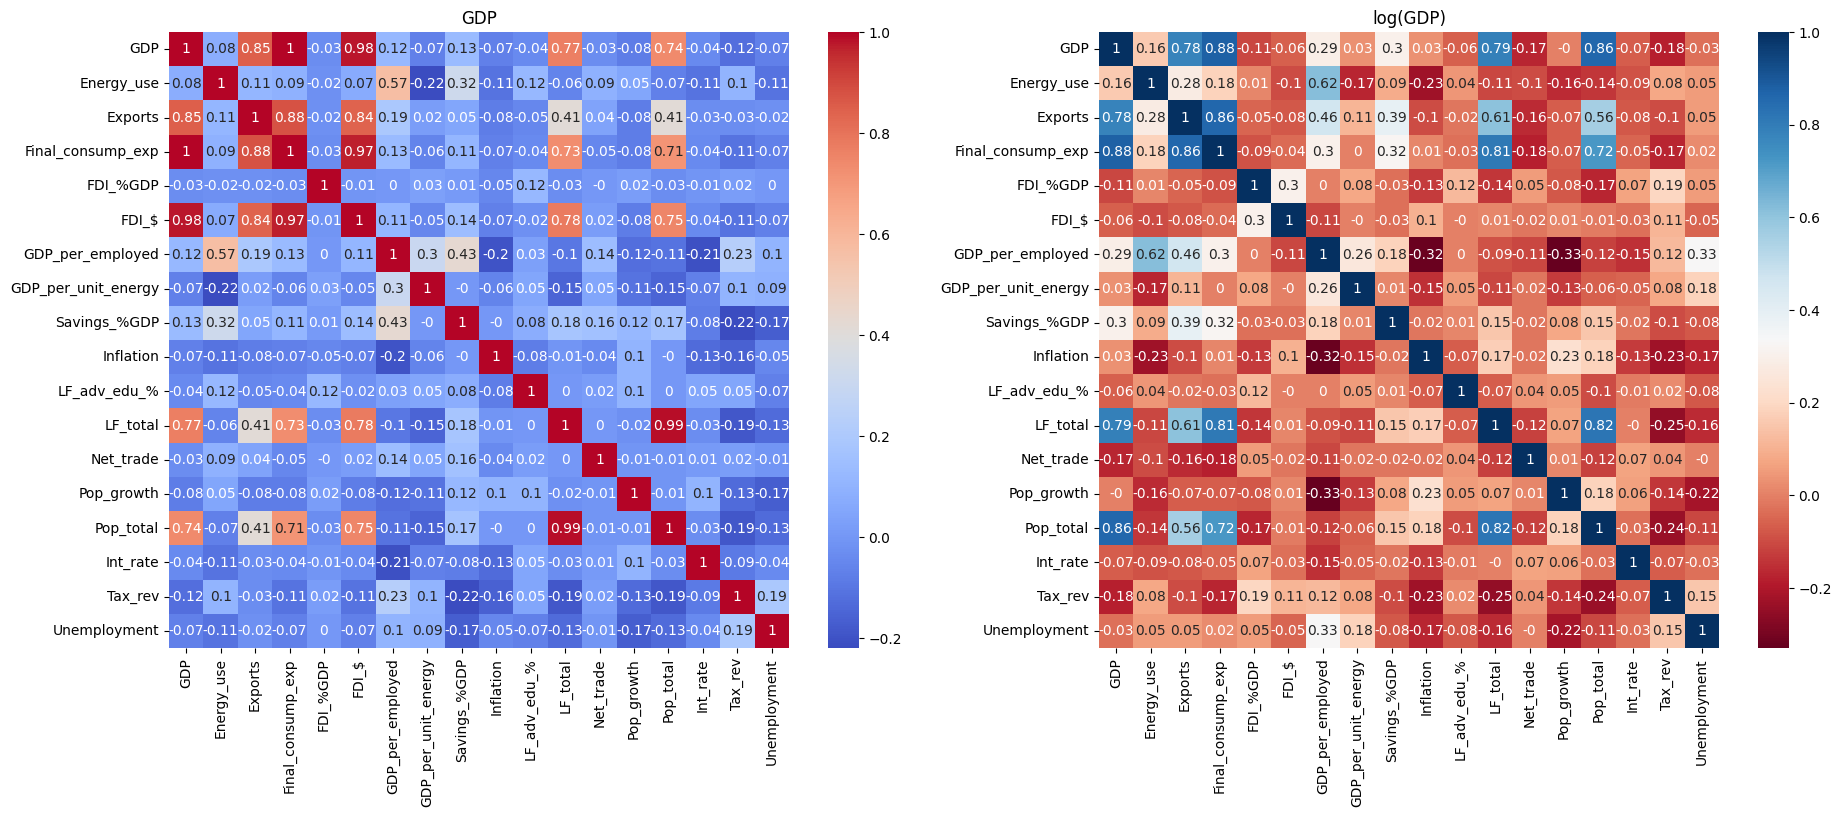

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 8))

corr_matrix = df.corr().round(2)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax1)

corr_matrix = df_log.corr().round(2)
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', ax=ax2)

ax1.set_title('GDP')
ax2.set_title('log(GDP)')
plt.show()

The log-transformed GDP has strong positive relationships with several factors, such as Final consumption expenditure, Total population, and Total labor force. On the other hand, the original GDP also has strong positive relationships with Final consumption expenditure, FDI in dollars, and Exports. It seems that the log transformation provides a clearer picture of the relationships between the variables and GDP.

It may not be clear for now, but in the next plots, you'll see the real difference.

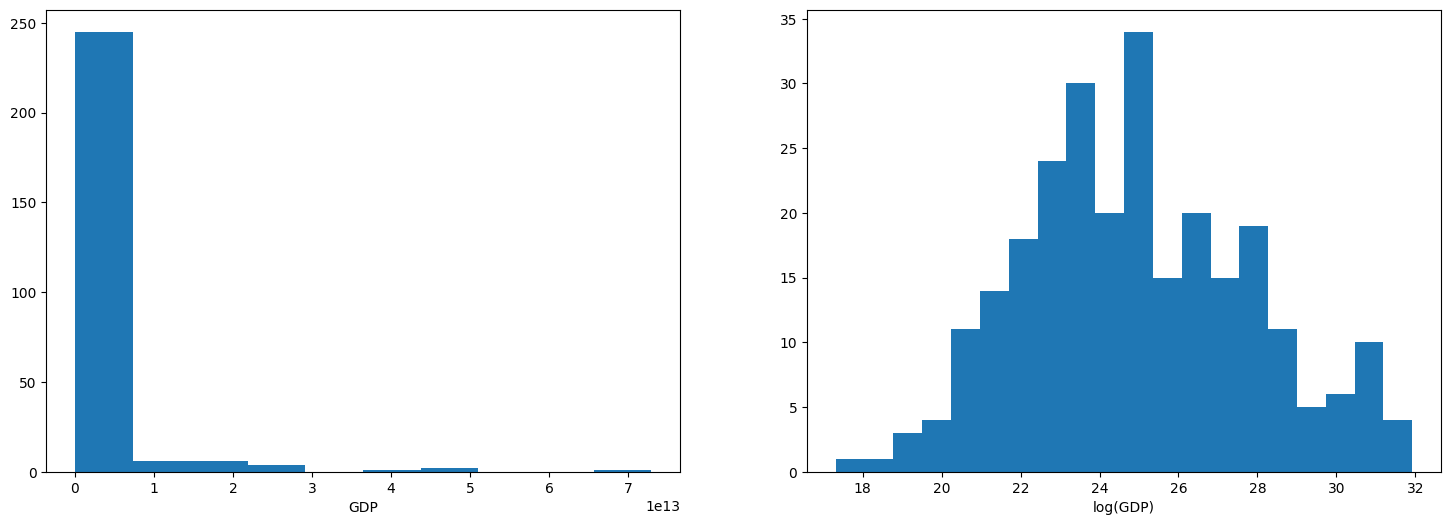

In [22]:
plt.figure(figsize=(18, 6))

plt.subplot(121)
plt.hist(df.GDP, bins=10)
plt.xlabel('GDP')

plt.subplot(122)
plt.hist(df_log.GDP, bins=20)
plt.xlabel('log(GDP)')

plt.show()

Take a look at these histograms. On the left, you can see the original GDP data doesn't look so great - it's uneven and doesn't give us much to work with. But on the right, you'll see the log-transformed data looks much better. It's more evenly distributed and easier to work with.

In [23]:
# like why we need to use log values

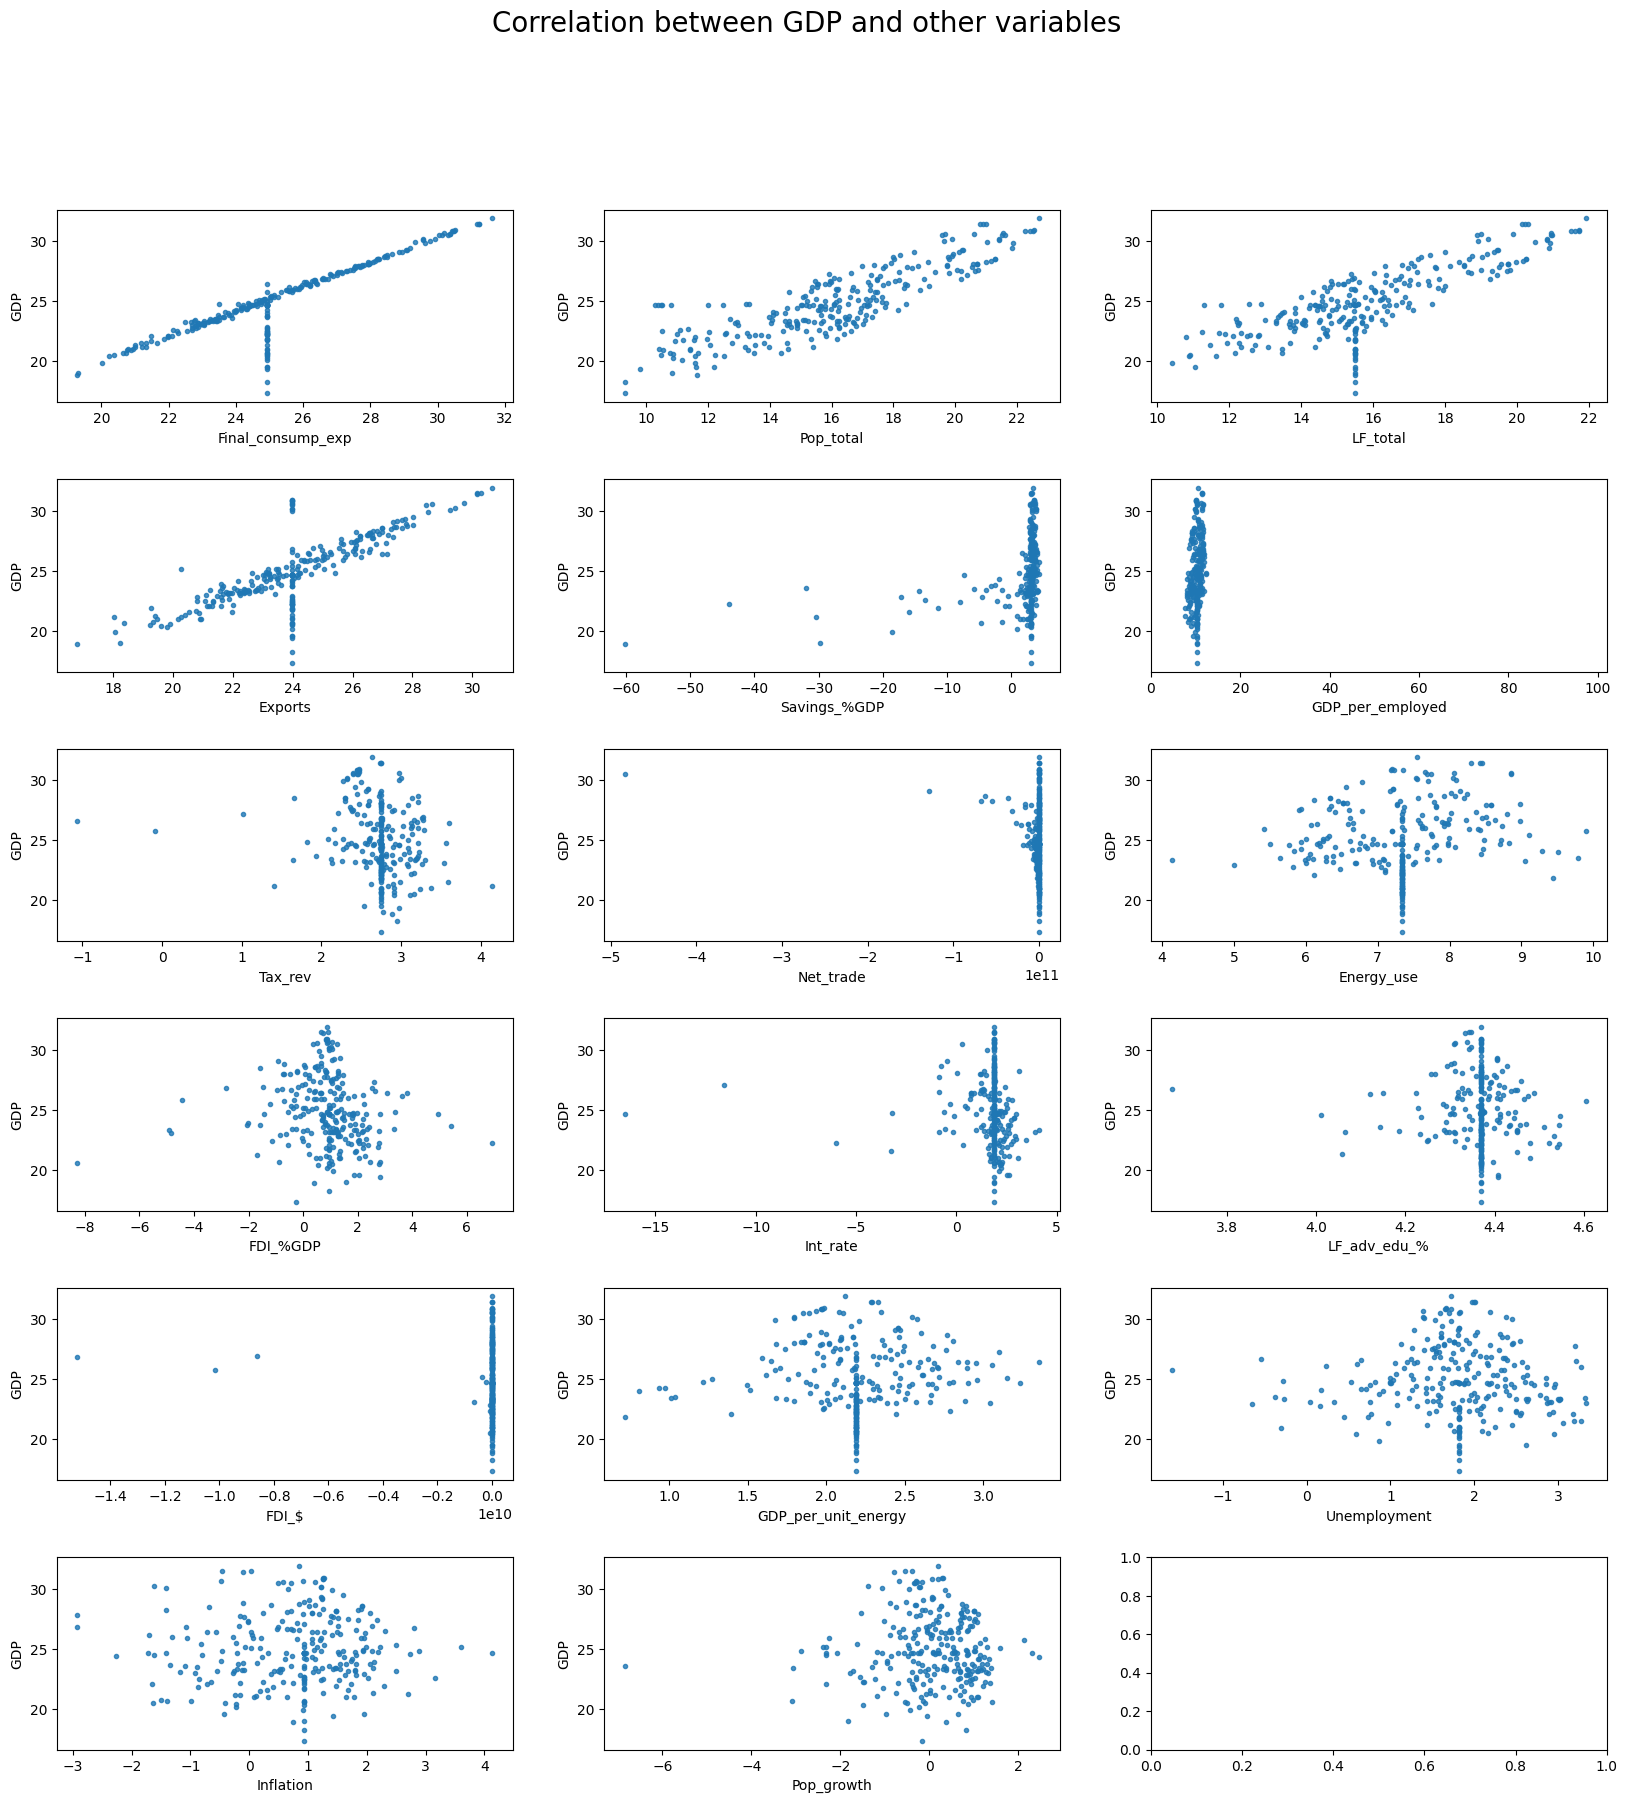

In [24]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 20))
fig.suptitle('Correlation between GDP and other variables', fontsize=20)
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series(dtype='float64')
for col in df_log.columns.values[1:]:
    if (col != 'GDP') & (col != 'Country') & (col != 'Year'):
        corr_to_gdp[col] = df_log['GDP'].corr(df_log[col])

abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

num_plots = min(len(corr_to_gdp), 6 * 3) # to handle the case when there are less than 6*3 variables
for i in range(6):
    for j in range(3):
        if i * 3 + j >= num_plots:  # break the loop if we have made all the necessary plots
            break
        sns.regplot(x=corr_to_gdp.index.values[i * 3 + j], y='GDP', data=df_log,
                    ax=axes[i, j], fit_reg=False, marker='.')

axes[1, 2].set_xlim(0, 102)

plt.show()

#### let's take a better look on the variables that have the strongest correlation with GDP

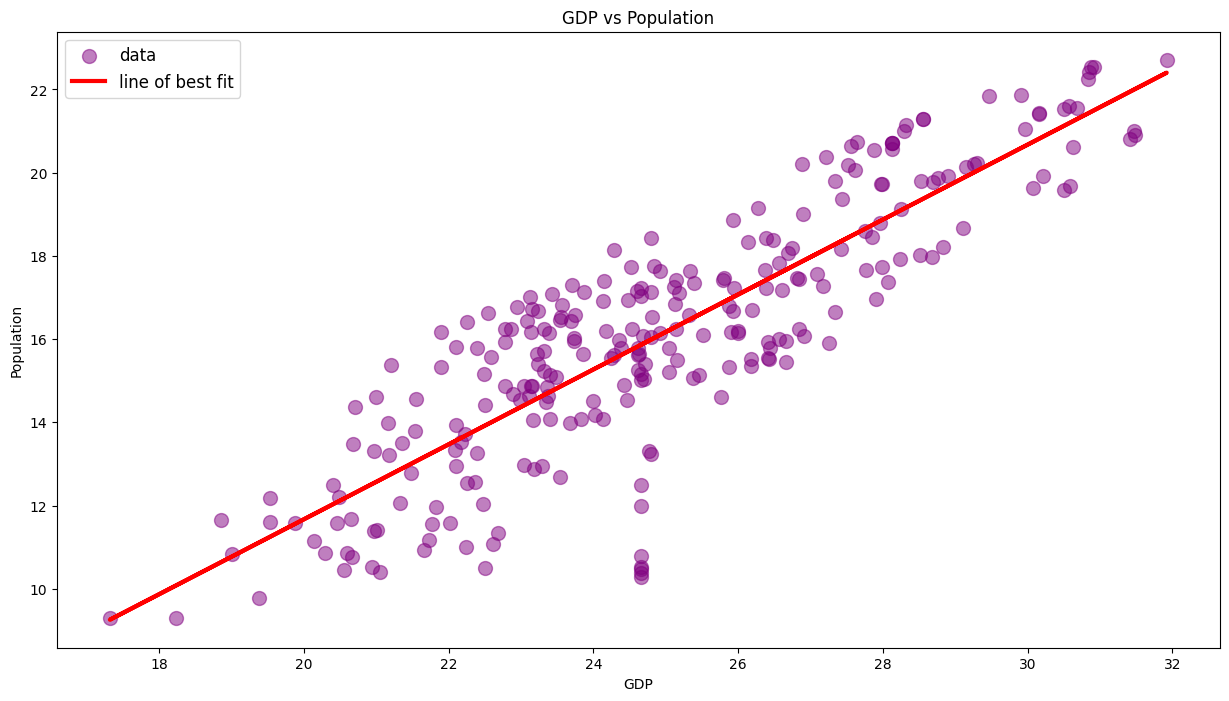

In [25]:
plt.figure(figsize=(15, 8))

plt.scatter(np.log(df.GDP), np.log(df.Pop_total), s=100, c='purple', alpha=0.5)
# line of best fit
z = np.polyfit(np.log(df.GDP), np.log(df.Pop_total), 1)
p = np.poly1d(z)
plt.plot(np.log(df.GDP), p(np.log(df.GDP)), 'red', linewidth=3)

plt.xlabel('GDP')
plt.ylabel('Population')
plt.title('GDP vs Population')
plt.legend(['data', 'line of best fit'], loc='upper left', fontsize=12)

plt.show()

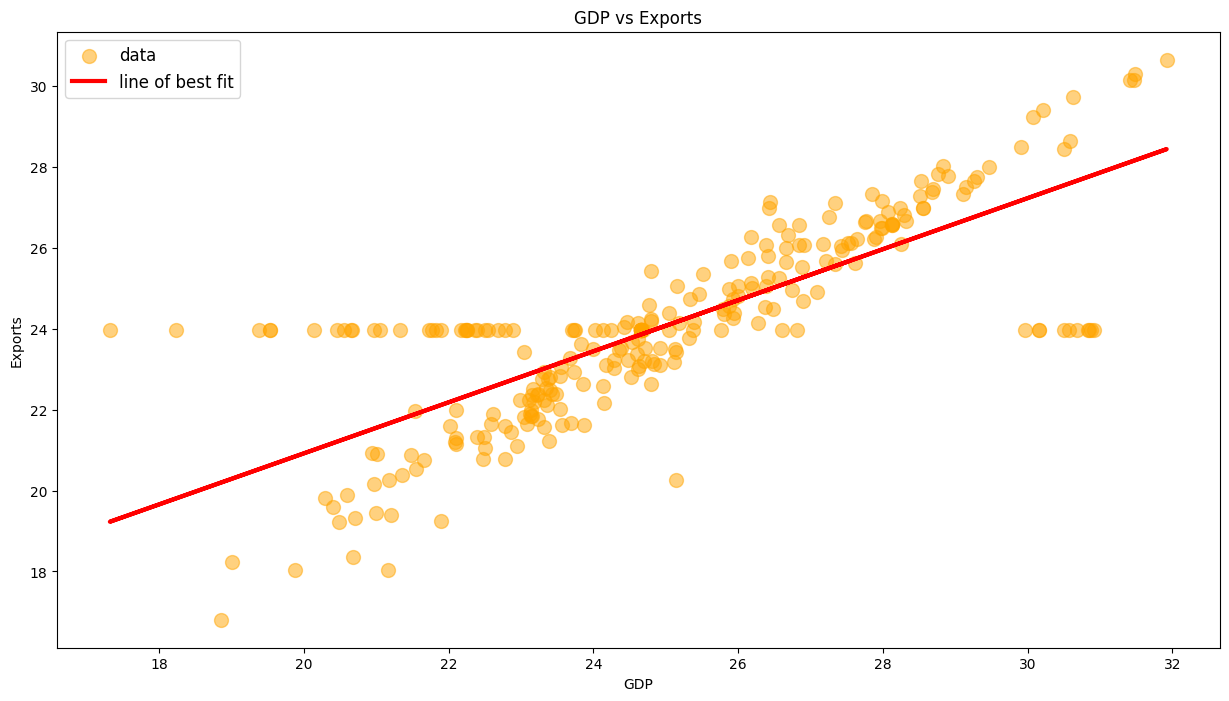

In [26]:
plt.figure(figsize=(15, 8))

plt.scatter(np.log(df.GDP), np.log(df.Exports), s=100, c='orange', alpha=0.5)

z = np.polyfit(np.log(df.GDP), np.log(df.Exports), 1)
p = np.poly1d(z)
plt.plot(np.log(df.GDP), p(np.log(df.GDP)), 'red', linewidth=3)

plt.xlabel('GDP')
plt.ylabel('Exports')
plt.legend(['data', 'line of best fit'], loc='upper left', fontsize=12)
plt.title('GDP vs Exports')
plt.show()

In some cases, the slope of straight line might appear to be slightly changed due to the use of median values to fill missing data, which created vertically/horizontally positioned dots in the plot. Nevertheless, the use of log transformed GDP helped to better illustrate the relationship between the two variables.

# Model Training and Evaluation

In [27]:
def eval_reg(df_, is_log=False, n_iter=10):
    x = df_.drop(['GDP', 'Country'], axis=1)
    y = df_['GDP']

    r2_scores = []
    rmse_values = []

    for i in range(n_iter):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

        model = LinearRegression().fit(x_train, y_train)

        if is_log:
            y_train = np.log(y_train)
            y_test = np.log(y_test)

        model.fit(x_train, y_train)
        y_predict = model.predict(x_test)

        rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
        model.fit(x_train, y_train)

        r2_scores.append(model.score(x_test, y_test))
        rmse_values.append(rmse)

    avg_r2 = np.mean(r2_scores).round(2)
    avg_rmse = np.mean(rmse_values).round(2)

    print('Avg R2 score\t: ', avg_r2, '\nAvg RMSE\t: ', avg_rmse)

I have developed a solution to predict the GDP values, both in original and logarithmic form, using the available data in a dataframe. To obtain more accurate results, I have implemented a feature to calculate the average of n-iterations of the model training and evaluation process. This has been achieved using linear regression, a commonly used method for predicting continuous values. The solution calculates and prints out the average R2 score and average RMSE, which are both standard evaluation metrics for regression models. These values give us a good indication of the model's performance and accuracy in predicting GDP values.

In [28]:
eval_reg(df) # checking the model with the original data

Avg R2 score	:  1.0 
Avg RMSE	:  161776491689.38


In [29]:
eval_reg(df_log, n_iter=200) # checking the model with the log-transformed data

Avg R2 score	:  0.93 
Avg RMSE	:  0.76


In [30]:
eval_reg(df_log, is_log=True, n_iter=1000) # checking the model with the log-transformed data and log-transformed target with

Avg R2 score	:  0.91 
Avg RMSE	:  0.03


The first evaluation of the model using the original data showed an R2 score of 1.0 and an RMSE of 161776491689.38 (last time). This result suggested that the model was very good in predicting the target variable, however, a closer look at the large RMSE value indicated that the model might not be as accurate as it appeared.

The second evaluation was performed on the log-transformed data and showed an R2 score of 0.93 and an RMSE of 0.76. This result indicated that the log-transformation of the data improved the model's accuracy, but there was still some room for improvement.

The third evaluation was performed on both the log-transformed data and the log-transformed target and showed an R2 score of 0.91 and an RMSE of 0.03. This result further indicated that the log-transformation of the target improved the model's accuracy, and it can be concluded that this is the best-performing model out of the three evaluations.

In conclusion, the results of the linear regression model on the GDP dataset showed that transforming the target variable to log values and also transforming the input variables resulted in a decrease in the average R2 score from 1.0 to 0.91. However, this decrease in R2 score was expected as the first score was too high to be accurate. Additionally, the average RMSE value was reduced from 161776491689.38 to 0.03. This indicates that the model was better able to predict the log transformed target variable using the log transformed input variables.
Although I'm not certain if this is the best approach to solve this problem, I am pleased with the decrease in RMSE value and grateful for the opportunity to experiment with the model.